In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/ML Project/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# There are no Null Value in DataFrame
# There are 31 columns in Dataset.
# There are 2 types of data types in Dataset float64 and int64.
# float64 contains 30 columns and 1 columns of int64. 

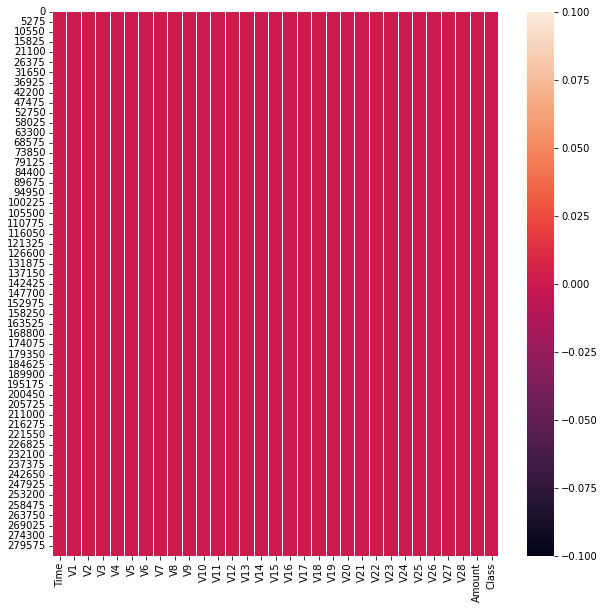

In [8]:
# Creating a heatmap to visualize the null values.
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

# Checking if Output is balance .

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

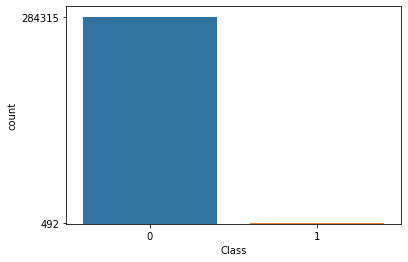

In [10]:
# Visualizing the balance.
sns.countplot(data=df,x='Class')
f=df['Class'].value_counts()
plt.yticks(f)
plt.show()

Spliting DataFrame in x(input) and y(output)

In [11]:
# Split Data in
x=df.drop('Class',axis=1) # Input
y=df['Class'] # Output

In [12]:
# importing train test split
from sklearn.model_selection import train_test_split
# Spliting Data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

 Applying Scaling .

In [13]:
from sklearn.preprocessing import StandardScaler
# creating object for StandardScaler
ss=StandardScaler()
# Appling Scaling
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [14]:
y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [15]:
y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [16]:
# Apply RandomOverSampler inbuild class
from imblearn.over_sampling import RandomOverSampler
# create object for Random Over Sampler
ros=RandomOverSampler(random_state=1)

In [17]:
# Applying RandomOverSampler on training data(70%) 
x_train,y_train=ros.fit_resample(x_train,y_train)

In [18]:
# Check after apply RandomOverSampler
y_train.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [19]:
# Applying RandomOverSampler on testing data(30%) 
x_test,y_test=ros.fit_resample(x_test,y_test)

In [20]:
# Check after apply RandomOverSampler
y_test.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [21]:
# Importing some other essential modules
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
# User Define function After Equalizing Dataset:
def train_model(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  return model

# Logistic Regression

In [23]:
# Importing Logistic Regression.
from sklearn.linear_model import LogisticRegression
# Creating an object for LogisticRegression.
lr=LogisticRegression(random_state=1)

In [24]:
lr=train_model(lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83724  1584]
 [ 8874 76434]]


# Decision Tree Classifier 

 Decision Tree Classifier Gini index

In [25]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Creating object 
dtc=DecisionTreeClassifier(random_state=1)

In [26]:
#Calling the function.
dtc=train_model(dtc)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.65      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

[[85275    33]
 [29819 55489]]


 Decision Tree Classifier with Entropy

In [27]:
# Creating object with Entropy
dtc0=DecisionTreeClassifier(random_state=1,criterion='entropy')
#Calling the function.
dtc0=train_model(dtc0)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.85    170616
weighted avg       0.88      0.85      0.85    170616

[[85272    36]
 [25398 59910]]


 Decision Tree Classifier with Max Depth

In [28]:
# Creating object with MAx Depth
dtc1=DecisionTreeClassifier(random_state=1,max_depth=3)
#calling the function
dtc1=train_model(dtc1)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

[[83524  1784]
 [12622 72686]]


 Decision Tree Classifier with Min Sample

In [29]:
# Creating object with Min Sample Leaf
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=40)
# calling object
dtc2=train_model(dtc2)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85153   155]
 [16491 68817]]


# Random Forest Classifier

In [30]:
# import Random Forest Library
from sklearn.ensemble import RandomForestClassifier
# creating object 
rfc=RandomForestClassifier(random_state=1,n_estimators=100,max_features=4)
# calling function
rfc=train_model(rfc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.91      0.88      0.88    170616
weighted avg       0.91      0.88      0.88    170616

[[85300     8]
 [19663 65645]]


 Random Forest Classifier with Entropy

In [31]:
# Creating object with Entropy
rfc1= RandomForestClassifier(criterion='entropy',random_state=1,n_estimators=100,max_features=7)
# Calling the object
rfc1=train_model(rfc1)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.91      0.88      0.88    170616
weighted avg       0.91      0.88      0.88    170616

[[85299     9]
 [19691 65617]]


# Boosting Tenhnique



# ADA Boosting ( Adaptor Boosting )

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
# creting object 
ada=AdaBoostClassifier(random_state=1,n_estimators=10)
# calling object
ada=train_model(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[81925  3383]
 [ 8199 77109]]


# Gradient Boosting Classifier

In [34]:
# import Gradinet Boost Library
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
# Create Library
gbc=GradientBoostingClassifier(random_state=1,n_estimators=40)
# caling function
gbc=train_model(gbc)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[84454   854]
 [11329 73979]]


# Xetreme Gradient Boost

In [36]:
# importing Xetreme Gradient Boost library
from xgboost import XGBClassifier

In [37]:
# Creating th eobject
xgb=XGBClassifier(random_state=1,reg_alpha=1,n_estimators=40)  
# calling the object
xgb=train_model(xgb)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[84714   594]
 [11961 73347]]


# Support Vector Machine

 Linear SVC

In [38]:
from sklearn.svm import LinearSVC

In [39]:
# creating the object
svc=LinearSVC(random_state=1,C=0.99)
# calling the object
svc=train_model(svc)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83834  1474]
 [ 8874 76434]]


SVC Polynomial Kernel Function

In [ ]:
from sklearn.svm import SVC
# creating object 
svc1=SVC(random_state=1,kernel='poly')
# calling the function
svc1=train_model(svc1)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       1.00      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[85082   226]
 [13871 71437]]


# K-NN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc=train_model(knc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

[[85247    61]
 [19106 66202]]


# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
gnb=GaussianNB()
gnb=train_model(gnb)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.97      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[83203  2105]
 [15152 70156]]


# Stacking Classifier


In [44]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [45]:
!pip install mlrose

In [46]:
from mlxtend.classifier import StackingClassifier
lr=LogisticRegression(random_state=1)
dtc=DecisionTreeClassifier(random_state=1,max_depth=3)
rfc=RandomForestClassifier(random_state=1,n_estimators=100,max_features=4)

In [47]:
model_list=[lr,dtc,rfc]
meta=LogisticRegression()

In [48]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)
sc=train_model(sc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.91      0.88      0.88    170616
weighted avg       0.91      0.88      0.88    170616

[[85300     8]
 [19663 65645]]


# Step Perform
- Import Basic Library
- Allocating Credit Card csv to df variable
- Check for Null Values
- Check if Output Value is Balanced
- Split Dataset in x and y
- Split train and test Data
- Apply Standard Sacler to Convert all colunm in same unit
- Apply Random Over Sampler for Inbalanced Data 
- Create User defined function for y_pred,Confussion Matrix 
  and Classification report
- Traning and Testing data with different types of Machine Learning Algorithm on Dataset 


# conclusion

- We have tried different type of Machine Learning Algorithm on Dataset 
- The Best Result we got is from Logistic Regression 0 - 0.98% & 1 - 0.90%
- But After Traning Dataset with different Algorithm 
  we got 0 - 0.98% & 1 - 0.90% from Linear Linear Support Vector Machine
  After Adding Error.
